<a href="https://colab.research.google.com/github/vennela506/Project/blob/main/Raw_Data_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os
zips = [
    "/content/drive/MyDrive/Uidi/api_data_aadhar_biometric.zip",
    "/content/drive/MyDrive/Uidi/api_data_aadhar_demographic.zip",
    "/content/drive/MyDrive/Uidi/api_data_aadhar_enrolment.zip"
]
for z in zips:
    if os.path.exists(z):
        with zipfile.ZipFile(z, 'r') as zip_ref:
            zip_ref.extractall()
        print(f"Successfully extracted: {z}")
    else:
        print(f"File not found: {z}. Please make sure you uploaded it.")

Successfully extracted: /content/drive/MyDrive/Uidi/api_data_aadhar_biometric.zip
Successfully extracted: /content/drive/MyDrive/Uidi/api_data_aadhar_demographic.zip
Successfully extracted: /content/drive/MyDrive/Uidi/api_data_aadhar_enrolment.zip


--- ENROLMENT DATA (BEFORE) ---


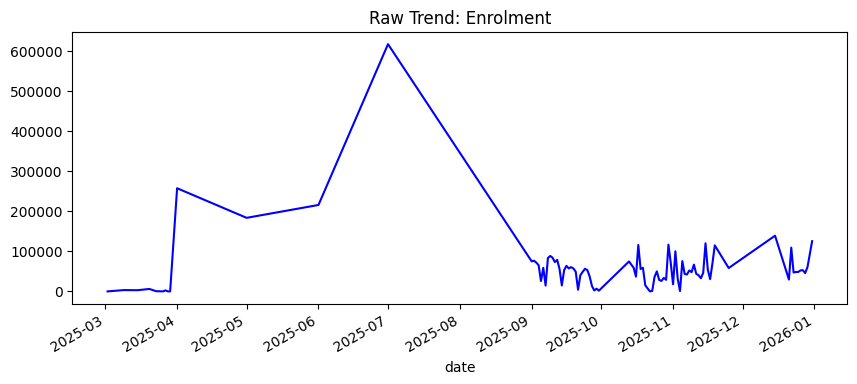

/tmp/ipython-input-2957525317.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_data.values, y=state_data.index, palette=color_palette[1])


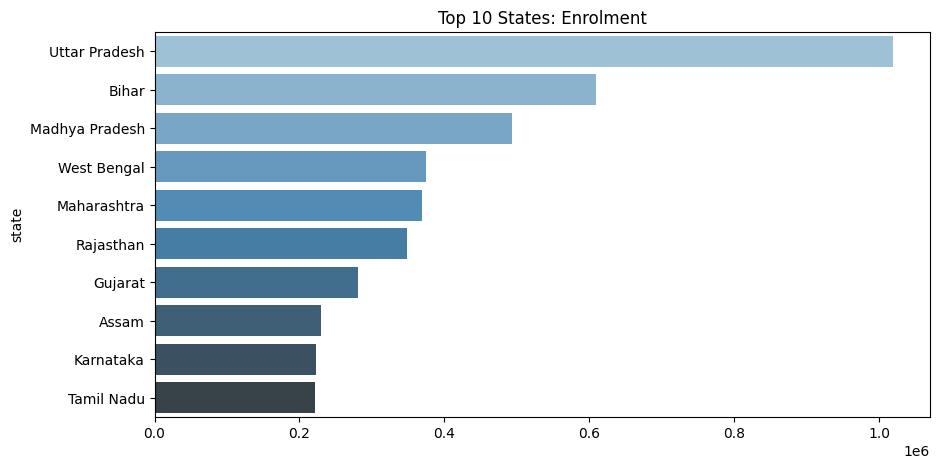

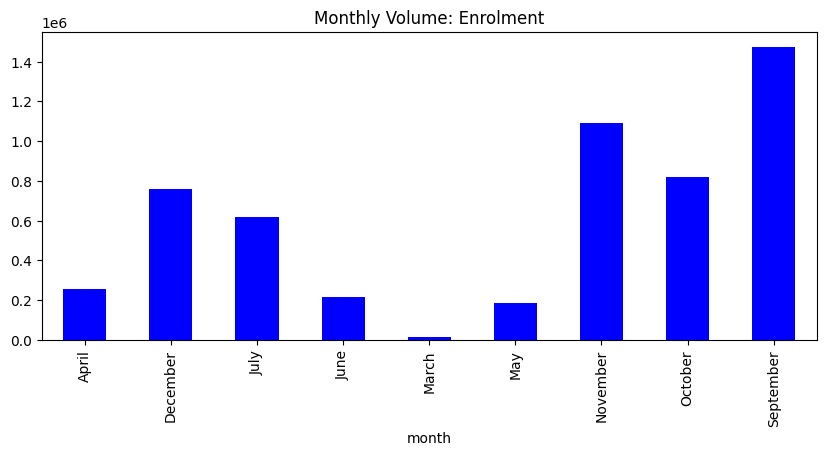

--- DEMOGRAPHIC DATA (BEFORE) ---


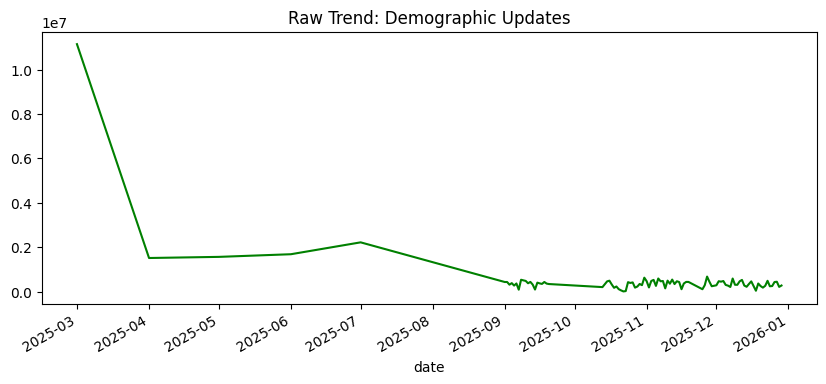

/tmp/ipython-input-2957525317.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_data.values, y=state_data.index, palette=color_palette[1])


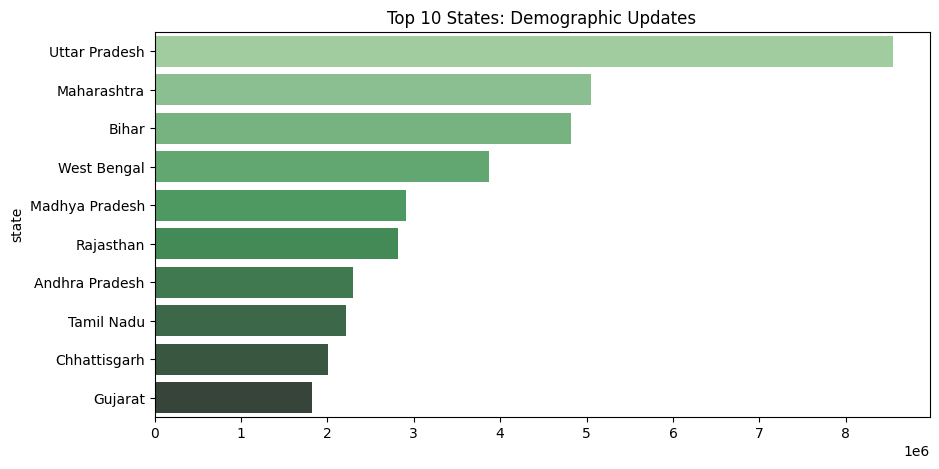

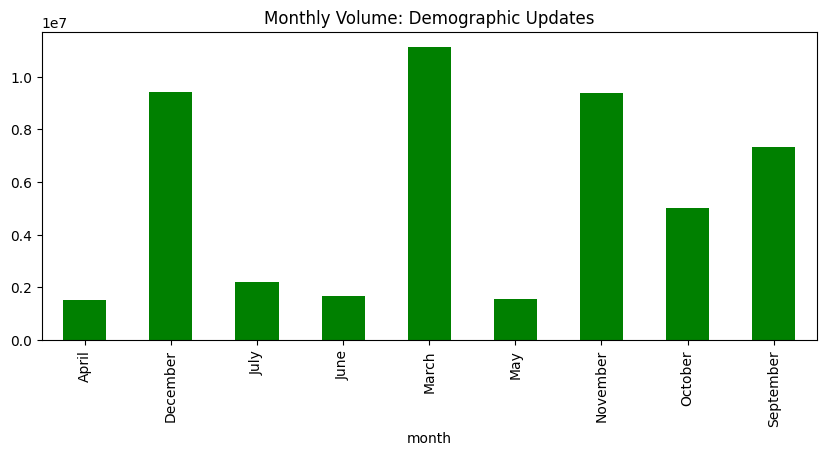

--- BIOMETRIC DATA (BEFORE) ---


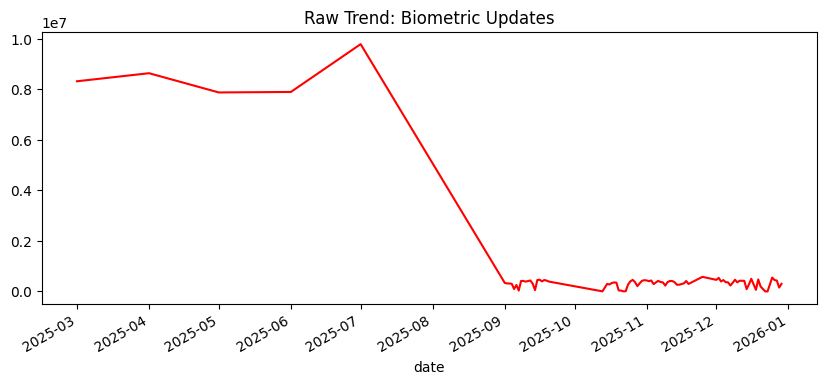

/tmp/ipython-input-2957525317.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_data.values, y=state_data.index, palette=color_palette[1])


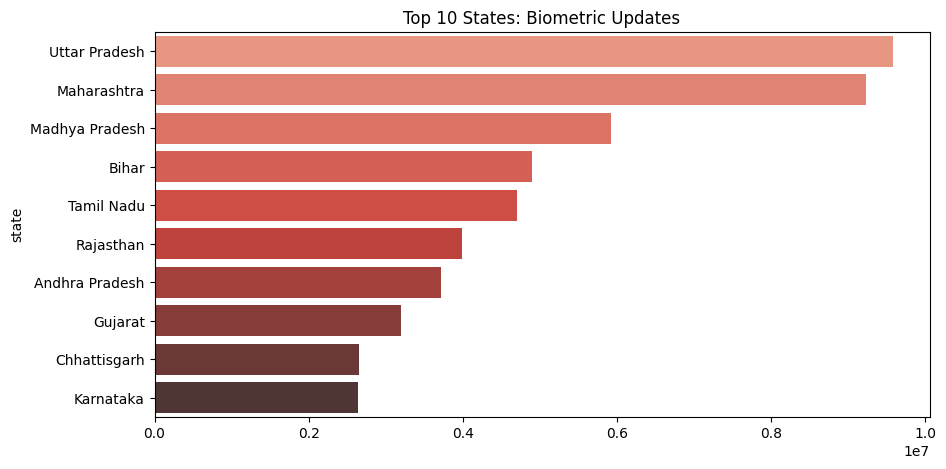

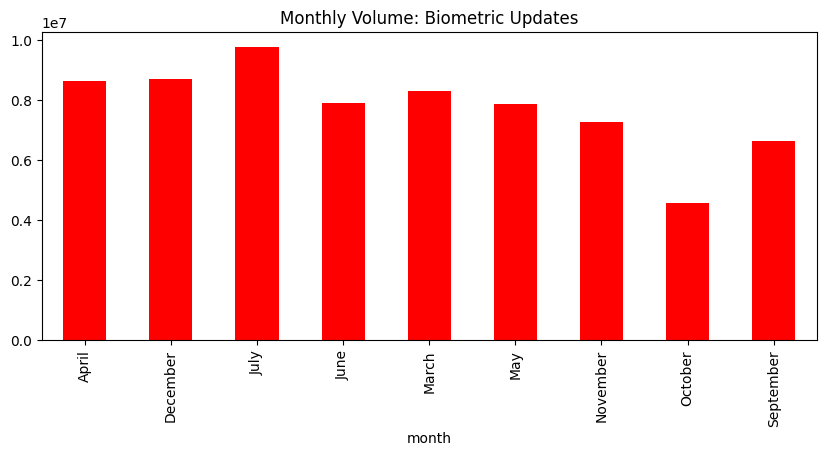

In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

def plot_baseline(dataset_name, sum_cols, label, color_palette):
    files = glob.glob(f"api_data_aadhar_{dataset_name}/*.csv")
    if not files:
        print(f"No CSV files found for {dataset_name}")
        return pd.DataFrame()
    df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)
    df['total'] = df[sum_cols].sum(axis=1)
    df['month'] = df['date'].dt.strftime('%B')
    plt.figure(figsize=(10, 4))
    df.groupby('date')['total'].sum().plot(color=color_palette[0])
    plt.title(f'Raw Trend: {label}')
    plt.show()
    plt.figure(figsize=(10, 5))
    state_data = df.groupby('state')['total'].sum().sort_values(ascending=False).head(10)
    sns.barplot(x=state_data.values, y=state_data.index, palette=color_palette[1])
    plt.title(f'Top 10 States: {label}')
    plt.show()
    plt.figure(figsize=(10, 4))
    month_data = df.groupby('month')['total'].sum()
    month_data.plot(kind='bar', color=color_palette[0])
    plt.title(f'Monthly Volume: {label}')
    plt.show()

    return df
print("--- ENROLMENT DATA (BEFORE) ---")
df_enrol = plot_baseline('enrolment', ['age_0_5', 'age_5_17', 'age_18_greater'], 'Enrolment', ['blue', 'Blues_d'])

print("--- DEMOGRAPHIC DATA (BEFORE) ---")
df_demo = plot_baseline('demographic', ['demo_age_5_17', 'demo_age_17_'], 'Demographic Updates', ['green', 'Greens_d'])

print("--- BIOMETRIC DATA (BEFORE) ---")
df_bio = plot_baseline('biometric', ['bio_age_5_17', 'bio_age_17_'], 'Biometric Updates', ['red', 'Reds_d'])